<a href="https://colab.research.google.com/github/haohe1113/Steam-Game-Rcmd-Engine/blob/master/Marketing_MDS_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv(r"steam-200k.csv", header = None).drop(4,axis=1)
df.columns = ['user', 'game', 'action', 'hours']
df = df[df['action'] == 'play'].copy()

In [4]:
game_list1 = df['game'].value_counts()[0:25].index.values.tolist()
game_list2 = df['game'].value_counts()[100:125].index.values.tolist()

game_list  = game_list1+game_list2

df = df[df['game'].isin(game_list)].copy()

In [5]:
userbyitem = pd.DataFrame(index=df['user'].unique(), columns=df['game'].unique())

for i in range(len(df)):
    user = df.iloc[i]['user']
    game = df.iloc[i]['game']
    userbyitem.loc[user,game] = df.iloc[i]['hours']


In [6]:
userbyitem.to_csv('userbyitem.csv', index=True)

In [7]:
ubyi = pd.read_csv('userbyitem.csv', index_col=0)
ubyi.head()

,The Elder Scrolls V Skyrim,Fallout New Vegas,Left 4 Dead 2,Team Fortress 2,Dead Island Epidemic,Marvel Heroes 2015,Dota 2,Robocraft,Garry's Mod,Sid Meier's Civilization V,...,Battlefield Bad Company 2,Warframe,Rising Storm/Red Orchestra 2 Multiplayer,Star Wars - Battlefront II,Call of Duty Black Ops II,theHunter,Grand Theft Auto San Andreas,Magicka Wizard Wars,Serious Sam HD The Second Encounter,Call of Duty Black Ops II - Zombies
151603712,273.0,12.1,8.9,2.8,1.4,0.5,0.5,0.4,0.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187131847,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,58.0,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,7.5,71.0,NaN,NaN,NaN,NaN,NaN,NaN,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140954425,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


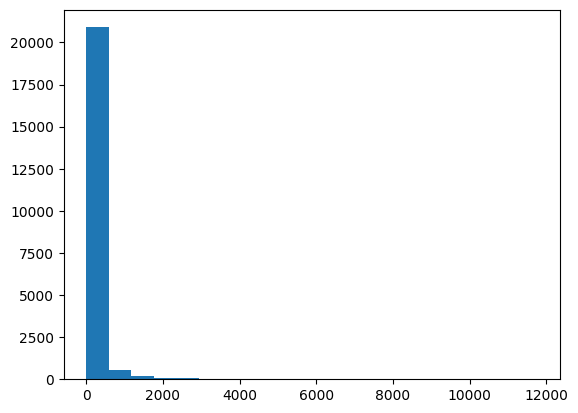

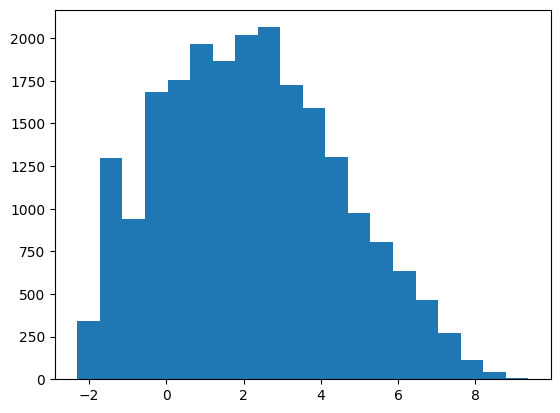

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

plt.hist(ubyi.values.flatten(), bins=20)
plt.show()

plt.hist(np.log(ubyi.values.flatten()), bins=20)
plt.show()

In [10]:
#log transform the data
ubyi_norm = np.log(ubyi)
#add the absolute value of the min value so that the data goes to an all positive scale
#this essentially turns the data into a 0 to 10 scale
ubyi_norm += abs(ubyi_norm.min().min())
print(ubyi_norm.min().min(), ubyi_norm.max().max())
#take out users that haven't rated at least 3 games
ubyi_norm = ubyi_norm[(~ubyi_norm.isnull()).sum(axis=1) >= 3]
ubyi_norm

0.0 11.674533980166641


,The Elder Scrolls V Skyrim,Fallout New Vegas,Left 4 Dead 2,Team Fortress 2,Dead Island Epidemic,Marvel Heroes 2015,Dota 2,Robocraft,Garry's Mod,Sid Meier's Civilization V,...,Battlefield Bad Company 2,Warframe,Rising Storm/Red Orchestra 2 Multiplayer,Star Wars - Battlefront II,Call of Duty Black Ops II,theHunter,Grand Theft Auto San Andreas,Magicka Wizard Wars,Serious Sam HD The Second Encounter,Call of Duty Black Ops II - Zombies
151603712,7.912057,4.795791,4.488636,3.332205,2.639057,1.609438,1.609438,1.386294,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59945701,6.363028,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,5.393628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,4.317488,6.565265,NaN,NaN,NaN,NaN,NaN,NaN,4.077537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126340495,NaN,NaN,NaN,5.081404,1.791759,NaN,9.789198,3.135494,4.624973,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131377772,NaN,NaN,NaN,1.791759,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.135494,NaN,NaN,NaN,NaN,2.639057
88705345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.356709,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125424716,NaN,NaN,5.521461,6.380123,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302585,NaN,NaN
99096740,6.109248,NaN,NaN,NaN,NaN,NaN,9.743319,NaN,NaN,NaN,...,NaN,7.528332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

ubyi_norm = ubyi.T
ubyi_norm.columns = [str(col) + '_id' for col in ubyi_norm.columns]

ubyi_norm.columns


Index(['151603712_id', '187131847_id', '59945701_id', '53875128_id',
       '140954425_id', '26122540_id', '176410694_id', '197278511_id',
       '150128162_id', '197455089_id',
       ...
       '295386628_id', '300991661_id', '135400225_id', '131377772_id',
       '88705345_id', '205881130_id', '125424716_id', '99096740_id',
       '176449171_id', '221315846_id'],
      dtype='object', length=9285)

In [12]:
#construct user correlation matrix
user_corr = pd.DataFrame(index=ubyi_norm.index.values, 
                         columns=ubyi_norm.index.values)


In [13]:
import numpy as np 
i = 0
for user1 in user_corr.index.values:
  #progress indicator
    i+=1
    if(i%50 == 0):
        print(i)
    for user2 in user_corr.columns.values:
        if user1 == user2:
            continue
        if not np.isnan(user_corr.loc[user1, user2]):
      #if the matrix value is already filled out, we don't need to calculate again
            continue
    #calculation correlation between two user vectors
        a = ubyi_norm.loc[user1].values
        b = ubyi_norm.loc[user2].values
        empty = ~np.logical_or(np.isnan(a), np.isnan(b))
        a=np.compress(empty,a)
        b=np.compress(empty,b)
        if(len(a) < 5):
      #if users have less than 5 items in common, just leave it NA
      #pearson similarity doesn't have much meaning in those cases
            continue
        corr = np.corrcoef(a,b)[0,1]
        user_corr.loc[user1,user2] = corr
        user_corr.loc[user2,user1] = corr

50


In [14]:
np.fill_diagonal(user_corr.values, 0)
user_corr.fillna(0)

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_19188\1032494310.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,The Elder Scrolls V Skyrim,Fallout New Vegas,Left 4 Dead 2,Team Fortress 2,Dead Island Epidemic,Marvel Heroes 2015,Dota 2,Robocraft,Garry's Mod,Sid Meier's Civilization V,...,Battlefield Bad Company 2,Warframe,Rising Storm/Red Orchestra 2 Multiplayer,Star Wars - Battlefront II,Call of Duty Black Ops II,theHunter,Grand Theft Auto San Andreas,Magicka Wizard Wars,Serious Sam HD The Second Encounter,Call of Duty Black Ops II - Zombies
The Elder Scrolls V Skyrim,0.000000,0.222794,0.043486,0.043040,0.204193,-0.120468,-0.021773,0.253863,0.002180,0.064727,...,0.051697,0.106107,0.093862,0.159746,-0.146682,0.038912,0.826618,0.005489,-0.084144,-0.137595
Fallout New Vegas,0.222794,0.000000,0.024400,0.058384,0.214753,0.213999,-0.073075,-0.203466,-0.031570,0.310628,...,0.248846,-0.037574,0.035932,-0.077720,-0.159186,-0.338557,0.443995,0.503330,0.599926,-0.096492
Left 4 Dead 2,0.043486,0.024400,0.000000,0.151358,0.234197,-0.050486,-0.043468,0.206528,0.064024,-0.080438,...,0.025825,0.303428,0.471841,0.172213,-0.103637,0.427426,-0.077913,-0.202069,0.076298,-0.063451
Team Fortress 2,0.043040,0.058384,0.151358,0.000000,0.019327,0.052574,-0.003110,-0.029745,0.093133,-0.012760,...,0.164129,0.208359,0.215181,0.430398,0.519414,0.288279,0.014906,-0.073508,-0.113373,0.354016
Dead Island Epidemic,0.204193,0.214753,0.234197,0.019327,0.000000,0.853338,-0.115887,0.344686,-0.049124,0.021470,...,-0.065024,0.321048,0.175131,0.085315,-0.456350,0.726358,-0.364941,-0.023333,-0.252265,-0.011937
Marvel Heroes 2015,-0.120468,0.213999,-0.050486,0.052574,0.853338,0.000000,-0.057938,0.461412,-0.166369,0.171637,...,0.000000,0.377353,0.000000,0.000000,0.208022,0.515811,0.000000,0.064236,0.000000,0.000000
Dota 2,-0.021773,-0.073075,-0.043468,-0.003110,-0.115887,-0.057938,0.000000,-0.102505,-0.069848,-0.148897,...,-0.087244,0.006155,0.138754,-0.147593,-0.075377,0.093309,-0.001267,-0.065068,0.268049,-0.115983
Robocraft,0.253863,-0.203466,0.206528,-0.029745,0.344686,0.461412,-0.102505,0.000000,-0.000377,-0.037135,...,0.275399,0.132248,-0.161726,0.242542,-0.136511,0.084276,-0.200673,0.483801,-0.417887,-0.101332
Garry's Mod,0.002180,-0.031570,0.064024,0.093133,-0.049124,-0.166369,-0.069848,-0.000377,0.000000,0.067132,...,0.358457,0.073411,0.064125,0.441882,0.073026,-0.077530,-0.040279,-0.241777,-0.049250,0.045690
Sid Meier's Civilization V,0.064727,0.310628,-0.080438,-0.012760,0.021470,0.171637,-0.148897,-0.037135,0.067132,0.000000,...,0.025088,-0.049485,-0.128939,0.166111,-0.040713,-0.266775,0.124568,-0.198719,-0.592815,0.054918


In [15]:
ubyi = ubyi.fillna(0)
ubyi = ubyi.T
test = ubyi.head()

In [16]:
user_corr = user_corr.fillna(0)

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_19188\3571941349.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [17]:
ubyi

,151603712,187131847,59945701,53875128,140954425,26122540,176410694,197278511,150128162,197455089,...,295386628,300991661,135400225,131377772,88705345,205881130,125424716,99096740,176449171,221315846
The Elder Scrolls V Skyrim,273.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0
Fallout New Vegas,12.1,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Left 4 Dead 2,8.9,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.4,0.0,0.0,0.0,25.0,0.0,0.0,0.0
Team Fortress 2,2.8,0.0,0.1,0.0,13.0,0.0,0.0,0.0,42.0,0.0,...,0.0,0.0,0.0,0.6,0.0,3.5,59.0,0.0,0.9,6.0
Dead Island Epidemic,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marvel Heroes 2015,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dota 2,0.5,2.3,0.0,0.0,0.0,0.0,9.1,0.5,0.0,3.4,...,3.5,0.3,0.0,0.0,0.0,0.0,0.0,1704.0,1310.0,9.0
Robocraft,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0
Garry's Mod,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sid Meier's Civilization V,0.0,0.0,22.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ubyi)
embedding = MDS(n_components=2, dissimilarity='euclidean')
X_transformed = embedding.fit_transform(X_scaled)
X_transformed

array([[ 1.21251997e+01, -1.35163409e+01],
       [-4.71444810e+00,  5.88339154e+00],
       [ 1.23717647e+01, -5.41256669e+00],
       [-1.09300959e+01,  3.32378141e+01],
       [ 4.17400973e-01,  1.80486367e-01],
       [-1.34100497e+00,  3.28563512e+00],
       [-5.99779490e+01, -1.95569657e+01],
       [-4.59692181e+00, -6.74039907e+00],
       [ 1.26380381e+01,  7.63476273e+00],
       [-8.18276827e+00, -1.45748136e+01],
       [ 5.18915597e+00, -2.73894366e+01],
       [-8.35812448e+00,  2.95478223e+00],
       [ 9.52421850e-01,  2.03248439e-01],
       [ 2.32674605e+00, -7.86311225e+00],
       [ 9.78525520e+00,  5.63556391e-02],
       [ 1.12834269e+00,  9.47456990e-01],
       [ 2.83018021e+00, -5.03469828e+00],
       [ 5.98407787e+00, -6.04766817e+00],
       [ 7.37226798e-01, -2.48112237e+00],
       [ 4.58295778e-01,  1.76661112e+00],
       [-3.84759055e-01,  7.82146856e-01],
       [-9.84909371e+00, -3.36714007e+00],
       [-6.15513718e+00, -2.38030750e+00],
       [ 1.

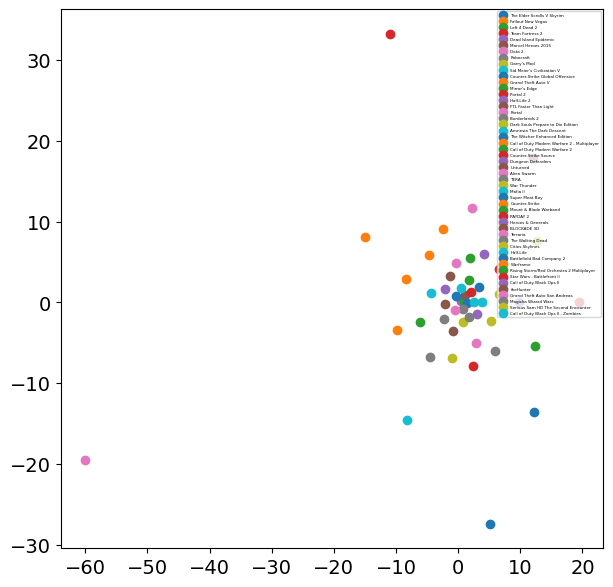

In [19]:
import matplotlib.pyplot as plt

colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# print(data.target)
for i in range(len(ubyi.index)):
    subset = X_transformed[i]
  # subset = X_scaled[data.target == i]
    x = subset[0]
    y = subset[1]
    plt.scatter(x,y, label= ubyi.index[i])
# plt.xlim(-0.9, 0.9)
# plt.ylim(-0.9, 0.9)
plt.legend(loc=1, prop={'size': 3})
plt.show()
